In [3]:
import os
import numpy as np
from random import random
import matplotlib.pyplot as plt
from math import *

In [16]:
# get data
data_dir="../cifar-10-batches-py/"
'''
data files contain three binary part.
batch_label: which represents the index of the dataset.
labels: which represents the category of the images, 
        the index of the row is also the row index of the image.
data: which is the image data that has 3072 columns, 
        the first 1024 columns represent the red channels of the 32x32 image, 
        the next 1024 columns represent the green one, 
        the last represent the blue one.
filenames: which is the name of the images.
'''
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def get_batch_data():
    batch_train=[]
    for i in range(1, 6):
        batch_train.append(unpickle(data_dir + "data_batch_" + i.__str__()))

    batch_test = unpickle(data_dir + "test_batch")
    return batch_train, batch_test

train_list,test_list= get_batch_data()
train_X = np.array(train_list[0].get(b'data'))
train_y=np.array(train_list[0].get(b'labels'))
for i in range(1,len(train_list)):
    train_X = np.concatenate((train_X,train_list[i].get(b'data')),axis=0)
    train_y = np.concatenate((train_y,train_list[i].get(b'labels')),axis=0)
X = train_X/500
test_X = np.array(test_list.get(b'data'))/500
test_y = np.array(test_list.get(b'labels'))
print("train: ",train_X.shape,train_y.shape)
print("test:  ",test_X.shape,test_y.shape)

# hog data
# train_X, train_y, test_X, test_y = get_all_data()
# train_X, train_y, test_X, test_y = get_hog_data(train_X, train_y, test_X, test_y, orientations=9, pixels_per_cell=(4, 4), cells_per_block=(4, 4))
# print("hog has been done.")


train:  (50000, 3072) (50000,)
test:   (10000, 3072) (10000,)


In [17]:
def predict(m,x):
    W=m['W']
    b=m['b']
    z=np.matmul(x,W)+b
    exp_scores=np.exp(z)
    a=exp_scores / np.sum(exp_scores,axis=1,keepdims=True)
    return np.argmax(a,1)

Y=np.eye(train_y.shape[0],train_y.max()-train_y.min()+1)[train_y]
num_sample=X.shape[0]
input_dims=X.shape[1]
output_dims=Y.shape[1]

In [29]:
W=np.random.randn(input_dims,output_dims)/10
b=np.zeros((1,output_dims))
model={'W':W,'b':b}

test_acc=[]
train_acc=[]

In [38]:
# hyper 
#0.0005 0.0001 0.00002
# 1 2 1 1
#学习速率
epsilon = 0.000004
#正则化系数
reg_lambda = 2
#一次训练过几遍数据
epochs = 1
#mini batch的batch大小
batch_size = 1000

In [39]:
W=model['W']
b=model['b']
n=ceil(num_sample / batch_size)
for i in range(epochs):
    for j in range(n):
        xx=X[batch_size*j:batch_size*(j+1)]
        yy=train_y[batch_size*j:batch_size*(j+1)]
        zz=np.matmul(xx,W)+b
        exp_scores=np.exp(zz)
        A = exp_scores / np.sum(exp_scores,axis=1,keepdims=True)
        delta = A
        delta[range(len(yy)),yy]-=1
        dW=np.matmul(xx.T,delta)
        db=np.sum(delta,axis=0,keepdims=True)
        dW+=reg_lambda*W
        W-=epsilon*dW
        b-=epsilon*db
        test_acc.append(np.equal(predict(model,test_X),test_y).mean())
        train_acc.append(np.equal(predict(model,X),train_y).mean())
        print("test acc: ",test_acc[-1])
        print("train acc: ",train_acc[-1])
        print("\n")

test acc:  0.3496
train acc:  0.35438


test acc:  0.3502
train acc:  0.35446


test acc:  0.3498
train acc:  0.35458


test acc:  0.3504
train acc:  0.35486


test acc:  0.3506
train acc:  0.35488


test acc:  0.35
train acc:  0.35518


test acc:  0.3499
train acc:  0.35504


test acc:  0.3504
train acc:  0.35502


test acc:  0.3505
train acc:  0.35542


test acc:  0.3502
train acc:  0.35552


test acc:  0.3504
train acc:  0.35504


test acc:  0.3505
train acc:  0.35548


test acc:  0.3498
train acc:  0.35594


test acc:  0.3497
train acc:  0.35596


test acc:  0.3508
train acc:  0.35574


test acc:  0.3509
train acc:  0.35582


test acc:  0.3504
train acc:  0.3556


test acc:  0.3504
train acc:  0.35586


test acc:  0.351
train acc:  0.35594


test acc:  0.3508
train acc:  0.3559


test acc:  0.3505
train acc:  0.35562


test acc:  0.3505
train acc:  0.35606


test acc:  0.3505
train acc:  0.35594


test acc:  0.3499
train acc:  0.3557


test acc:  0.35
train acc:  0.35566


test acc

In [41]:
xa=np.linspace(1,250,250)
len(test_acc)

250

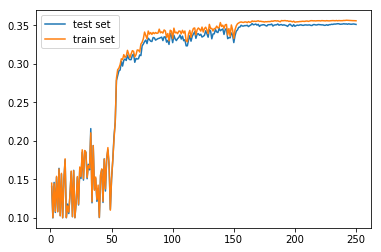

In [48]:
plt.plot(xa,test_acc,label='test set')
plt.plot(xa,train_acc,label='train set')
plt.legend(loc='best')